In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from path import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#read myopia.csv into a Pandas DataFrame
file_path = Path("./myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#drop the MYOPIC column from our DataFrame
df = df.drop('MYOPIC', axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
#Standardizing the dataset
df.drop_duplicates()
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#Scaling the Data
scaled_df = StandardScaler().fit_transform(df)
print(scaled_df[0:7])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]
 [-0.42021911  1.50779097 -0.5249931  -1.54047905  0.0942193  -0.02528499
  -0.2453042   1.04507157 -0.03443904 -0.22140908  1

In [6]:
#Use our desired Explained Variance to preserve 90% of the explained variance with PCA
from sklearn.decomposition import PCA
PCA = PCA(n_components=0.90)

PCA_df = PCA.fit_transform(scaled_df)

In [7]:
new_PCA_df = pd.DataFrame(data=PCA_df)
new_PCA_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [8]:
#Getting the explained Variance Ratio
PCA.explained_variance_ratio_.sum()

0.9187361702915187

In [9]:
#checking the shape of our current DataFrame
new_PCA_df.shape

(618, 10)

In [10]:
#Reduce the dataset  dimensions further with t-SNE
from sklearn.manifold import TSNE
tnse = TSNE(learning_rate=200)

In [11]:
tsne_features = tnse.fit_transform(new_PCA_df)

C:\Users\Kirsten\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
#checking the shape
tsne_features.shape

(618, 2)

In [13]:
new_PCA_df['X'] = tsne_features[:,0]
new_PCA_df['y'] = tsne_features[:,1]

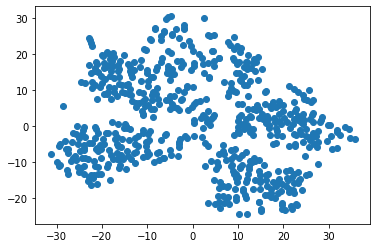

In [14]:
plt.scatter(new_PCA_df['X'], new_PCA_df['y'])
plt.show()

In [15]:
#creating a for loop for our elbow plot
inertia = []

k=[i for i in range(1,11)]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_PCA_df)
    inertia.append(km.inertia_)           

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

C:\Users\Kirsten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Kirsten\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kirsten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Kirsten\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised 

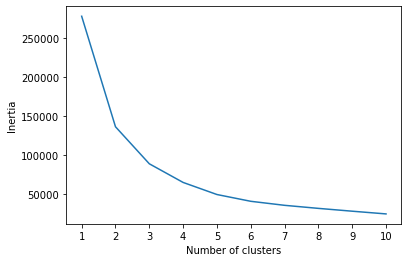

The elbow of the plot is at value of 5 clusters


In [16]:
#creating the elbow plot
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print('The elbow of the plot is at value of 5 clusters')

In [17]:
#MY CONCLUSION
#Based on the data and resulting scatter and elbow plots, it is looking that 
    #we would need 5 clusters of data for this particular set.
#Based on the number of clusters and the results of the elbow plot, I think it would be wise to seperate the training 
    #and testing sets and redo the above analysis - this would help ensure a more accurate analysis for predictions
        #and clustering